# Donovan Feist

# CH EN 3603

# Problem 3

Given a cylindrical tank in where a chemical reaction $A \rightarrow B$ is occurring with reaction rate given by $S_A = -kc^2$. Assume that you are given $c_A^{in}$ (the inlet concentration of species A), $\dot V_{in}$, $r$ (the radius of the hole in the bottom of the tank) and $u=\sqrt{2gh}$ for the outlet velocity. You may assume that the concentration is uniform throughout the tank (perfect mixing). Also assume that the reaction does not result in a change in the molar volume of the mixture.

1. Show that
\begin{equation}
\frac{dc_A}{dt}=\frac{\dot V_{in}}{A_c h} (c_A^{in}-c_A)-kc_A^2$,
\end{equation}
where $A_c$ is the cross-sectional area of the tank.

    Hints:
    
    $\bullet $ Note that both $c_A$ and $V$ are changing in time.

    $\bullet $ You will need to derive an equation for $\frac{dV}{dt}$ which you can substitute.

    Note that you need to show work that demonstrates that you can derive this (working backward from the answer won’t get you too far). Otherwise you won’t receive credit.

2. Determine $c_A (t)$ and $h(t)$ given: a tank diameter of $0.5 m$ and height of H = 1 m, $c_A (0) = 0 \frac {mol}{m^3}$, $c_A^{in} = 1 \frac {mol}{m^3}$, $k = 10^{-2} s^{-1}$, a hole in the bottom with radius $r = 1 cm$, an inlet flow rate such that at steady state the tank is half full, and an initial liquid level of $5$% and $95%$ the tank height. Plot the concentration of A, the moles of A and the height of the liquid in the tank over a 10-minute time period. Put the results for the two initial liquid levels on the same plot, but provide separate plots for $c_A (t)$, $N_A (t)$ and $h(t)$.

3. For the numbers in part 2, determine the steady-state concentration of A. Hint: at steady state, $\frac{dc_i}{dt} = 0$.

## Part 1 Solution

We start with the integral mole balance equation,

$\frac{d}{dt} \int_V c_i \space dV=-\int_S \vec{N_i} \cdot \hat a \space dS +\int_V S_i \space dS$

Because the concentration is uniform throughout the tank, the accumulation term is

$\frac{d}{dt} \int_V c_i \space dV = \frac{d}{dt} [c_A V] =c_A \frac{dV}{dt} + V \frac{dc_A}{dt}$

To generation term is

$\int_V S_i \space dS = \int_V -kc_A^2 \space dV= -kc_A^2V$

The molar flux term is

$-\int_S \vec{N_i} \cdot \hat a \space dS= c_A^{in} \dot V_{in}-c_A \dot V_{out}$.

Plugging these relationships into the original equation leads to

$c_A \frac{dV}{dt} + V \frac{dc_A}{dt}=\frac{dn_A}{dt}=c_A^{in} \dot V_{in}-c_A \dot V_{out}-kc_A^2V \space\space\space\space\space\space (1)$.

Using the relationship that

$V=A_ch$

and the relationship that

$\frac{dV}{dt}=\frac{dV}{dh}\frac{dh}{dt}$

leads to

$\frac{dV}{dt}=A_c\frac{dh}{dt}$.

Plugging this into equation $(1)$ leads to

$c_A A_c\frac{dh}{dt} + A_c h \frac{dc_A}{dt}=c_A^{in} \dot V_{in}-c_A \dot V_{out}-kc_A^2 A_c h \Rightarrow$

$A_c h \frac{dc_A}{dt}=c_A^{in} \dot V_{in}-c_A \dot V_{out}-c_A A_c\frac{dh}{dt}-kc_A^2 A_c h \Rightarrow$

$\frac{dc_A}{dt}=\frac{1}{A_c h} \left (c_A^{in} \dot V_{in}-c_A \dot V_{out}-c_A A_c\frac{dh}{dt} \right )-kc_A^2.$

We must now solve for $\frac{dh}{dt}$. Returning to the relationship

$\frac{dV}{dt}=A_c\frac{dh}{dt} \Rightarrow$

$\frac{dh}{dt}=\frac{1}{A_c}\frac{dV}{dt}=\frac{1}{A_c} (\dot V_{in}-\dot V_{out}).$

Plugging in $\frac{dh}{dt}$ leads to

$\frac{dc_A}{dt}=\frac{1}{A_c h} \left (c_A^{in} \dot V_{in}-c_A \dot V_{out}-c_A A_c\frac{1}{A_c}(\dot V_{in} - \dot V_{out}) \right )-kc_A^2 \Rightarrow $

## $\fbox {$\frac{dc_A}{dt}= \frac{\dot V_{in}}{A_c h} (c_A^{in}-c_A) -kc_A^2$} $

## Part 2 Solution

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Ac=np.pi*0.0625 #m^2
Cin=1 #mol/m^3
k=10**(-2) #1/s
r=0.01 #m
g=9.81 #m/s^2
H=1 #m
h1=0.05*H #m
h2=0.95*H #m
V̇in=np.pi*(r**2)*np.sqrt(2*g*H/2)

###define function###
def model(v,t):
    C=v[0]
    h=v[1]
    dcdt=(V̇in/(Ac*h))*(Cin-C)-k*C**2
    dhdt=(V̇in-np.pi*(r**2)*np.sqrt(2*g*h))/Ac
    dvdt=[dcdt,dhdt]
    return dvdt

###initial conditions###
v0_1=[0,h1]
v0_2=[0,h2]

t=np.linspace(0,600,1000) #s

sol1=odeint(model,v0_1,t)
sol2=odeint(model,v0_2,t)

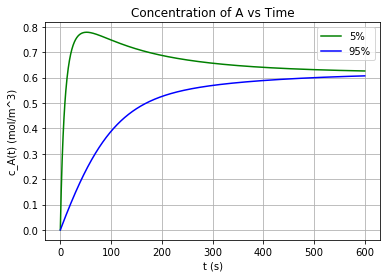

In [46]:
###Concentration###

plt.plot(t, sol1[:, 0], 'g', label='5%')
plt.plot(t, sol2[:, 0], 'b', label='95%')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('c_A(t) (mol/m^3)')
plt.grid()
plt.title('Concentration of A vs Time')
plt.show()

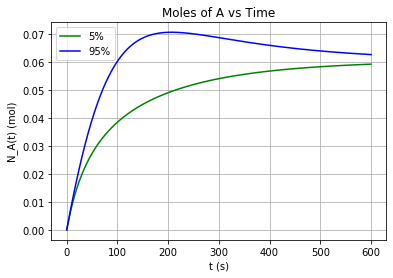

In [47]:
###Moles###

n1=sol1[:,0]*(Ac*sol1[:,1])
n2=sol2[:,0]*(Ac*sol2[:,1])

plt.plot(t, n1, 'g', label='5%')
plt.plot(t, n2, 'b', label='95%')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('N_A(t) (mol)')
plt.grid()
plt.title('Moles of A vs Time')
plt.show()


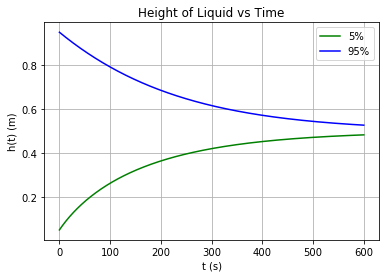

In [48]:
###Height###

plt.plot(t, sol1[:, 1], 'g', label='5%')
plt.plot(t, sol2[:, 1], 'b', label='95%')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('h(t) (m)')
plt.grid()
plt.title('Height of Liquid vs Time')
plt.show()

## Part 3 Solution

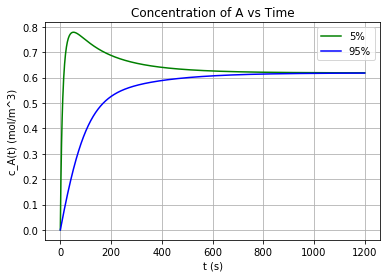

In [49]:
t=np.linspace(0,1200,1000) #s
sol1=odeint(model,v0_1,t)
sol2=odeint(model,v0_2,t)

plt.plot(t, sol1[:, 0], 'g', label='5%')
plt.plot(t, sol2[:, 0], 'b', label='95%')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('c_A(t) (mol/m^3)')
plt.grid()
plt.title('Concentration of A vs Time')
plt.show()

In [50]:
print('The steady-state concentration is', sol1[999,0]," (mol/m^3).")

The steady-state concentration is 0.6187930604796223  (mol/m^3).
